<a href="https://colab.research.google.com/github/np03cs4s250092-commits/AI_Final_Assignment/blob/main/2548321_Rejina_Rana_Magar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/health_lifestyle_classification.csv')


In [6]:
# View first few records
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [8]:
df.shape

(100000, 48)

In [9]:
df.describe()

,survey_code,age,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,...,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92331.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,91530.000000,100000.000000,100000.0,89526.0,100000.0,100000.000000
mean,50000.500000,48.525990,170.023707,70.064862,24.493876,24.493876,73.481627,24.494140,84.933043,119.980149,...,2.006373,6.021525,4.991600,5.004680,4038.127284,2.998720,0.0,1.0,5.5,0.015726
std,28867.657797,17.886768,9.982798,14.693667,5.951069,5.951069,17.853206,5.954184,12.040314,15.015503,...,0.688868,2.933835,3.154997,3.164228,1930.025678,1.414786,0.0,0.0,0.0,5.764489
min,1.000000,18.000000,140.000000,40.000000,9.988495,9.988495,29.965484,9.893845,34.093185,59.128168,...,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,0.0,1.0,5.5,-9.999895
25%,25000.750000,33.000000,163.306615,59.856938,20.271405,20.271405,60.814215,20.271059,76.795185,109.812060,...,1.532011,3.971318,2.000000,2.000000,2665.402843,2.000000,0.0,1.0,5.5,-4.980501
50%,50000.500000,48.000000,170.016778,69.924141,24.156734,24.156734,72.470201,24.151699,84.957139,119.951794,...,2.000659,5.991171,5.000000,5.000000,4004.601345,3.000000,0.0,1.0,5.5,0.015589
75%,75000.250000,64.000000,176.728920,80.027418,28.258696,28.258696,84.776088,28.247648,93.018713,130.120621,...,2.473047,8.024470,8.000000,8.000000,5360.012694,4.000000,0.0,1.0,5.5,5.008424
max,100000.000000,79.000000,210.000000,139.250894,59.234792,59.234792,177.704377,59.142646,133.153631,184.439195,...,5.000000,16.000000,10.000000,10.000000,12029.409353,5.000000,0.0,1.0,5.5,9.999966


In [10]:
df['target'].value_counts()

,count
target,
healthy,70097
diseased,29903


In [11]:
df['target'] = df['target'].map({'healthy': 0, 'diseased': 1})

print("Target Counts:")
print(df['target'].value_counts())

Target Counts:
target
0    70097
1    29903
Name: count, dtype: int64


In [12]:
# std 0 that means sab ko same value  so cant distinguish for accuracy this all columns
cols_to_drop = ['survey_code', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"Columns dropped. Remaining columns: {len(df.columns)}")

Columns dropped. Remaining columns: 44


In [13]:
# List of numerical columns with missing values
num_cols_with_na = ['blood_pressure', 'heart_rate', 'insulin', 'daily_steps', 'income']

# Fill each with its Median
for col in num_cols_with_na:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Filled {col} with median: {median_val}")

# Check if any numerical missing values remain
print("\nMissing values remaining in numerical columns:")
print(df[num_cols_with_na].isnull().sum())

Filled blood_pressure with median: 119.95179411716607
Filled heart_rate with median: 75.04621089158658
Filled insulin with median: 14.983414245137542
Filled daily_steps with median: 7004.285449549983
Filled income with median: 4004.6013447418864

Missing values remaining in numerical columns:
blood_pressure    0
heart_rate        0
insulin           0
daily_steps       0
income            0
dtype: int64


In [14]:
# List of categorical columns with missing values
cat_cols_with_na = ['alcohol_consumption', 'exercise_type', 'caffeine_intake']

# Fill each with its Mode (most frequent value)
for col in cat_cols_with_na:
    # .mode()[0] gets the most frequent value
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Filled {col} with mode: {mode_val}")

# Final verification check for the whole dataframe
print("\nTotal missing values remaining in the entire dataset:", df.isnull().sum().sum())

Filled alcohol_consumption with mode: Occasionally
Filled exercise_type with mode: Strength
Filled caffeine_intake with mode: Moderate

Total missing values remaining in the entire dataset: 0


In [15]:

cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'target']

# 2. Standardize only the feature columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


print("Target distribution after safe cleaning:")
print(df['target'].value_counts())

Target distribution after safe cleaning:
target
0    70097
1    29903
Name: count, dtype: int64


In [16]:
# 1. Identify current numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Apply IQR Clipping
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Clip (cap) the values
    df[col] = np.clip(df[col], lower_limit, upper_limit)

print("Outliers have been handled using IQR clipping.")

# 3. View the updated statistics
df.describe()

Outliers have been handled using IQR clipping.


,age,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,...,calorie_intake,sugar_intake,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,daily_supplement_dosage,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,170.020522,70.048879,24.466873,24.466873,73.400620,24.466797,84.931998,119.975727,74.984111,...,2201.407276,60.049572,2.005614,6.018777,4.991600,5.004680,4030.778635,2.998720,0.015726,0.299030
std,17.886768,9.925046,14.645112,5.866376,5.866376,17.599129,5.868576,11.962895,14.251037,8.984379,...,397.665841,19.846372,0.686566,2.925647,3.154997,3.164228,1833.245053,1.414786,5.764489,0.457835
min,18.000000,143.173157,40.000000,9.988495,9.988495,29.965484,9.893845,52.459894,83.260080,53.159044,...,1123.868173,6.046150,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,-9.999895,0.000000
25%,33.000000,163.306615,59.856938,20.271405,20.271405,60.814215,20.271059,76.795185,110.815119,69.543894,...,1932.278165,46.504292,1.532011,3.971318,2.000000,2.000000,2796.061969,2.000000,-4.980501,0.000000
50%,48.000000,170.016778,69.924141,24.156734,24.156734,72.470201,24.151699,84.957139,119.951794,75.046211,...,2200.992765,60.047905,2.000659,5.991171,5.000000,5.000000,4004.601345,3.000000,0.015589,0.000000
75%,64.000000,176.728920,80.027418,28.258696,28.258696,84.776088,28.247648,93.018713,129.185145,80.467128,...,2471.218160,73.476386,2.473047,8.024470,8.000000,8.000000,5219.230324,4.000000,5.008424,1.000000
max,79.000000,196.862378,110.283138,40.239633,40.239633,120.718898,40.212532,117.354004,156.740184,96.851978,...,3279.628152,113.934527,3.884601,14.104197,10.000000,10.000000,8853.982857,5.000000,9.999966,1.000000


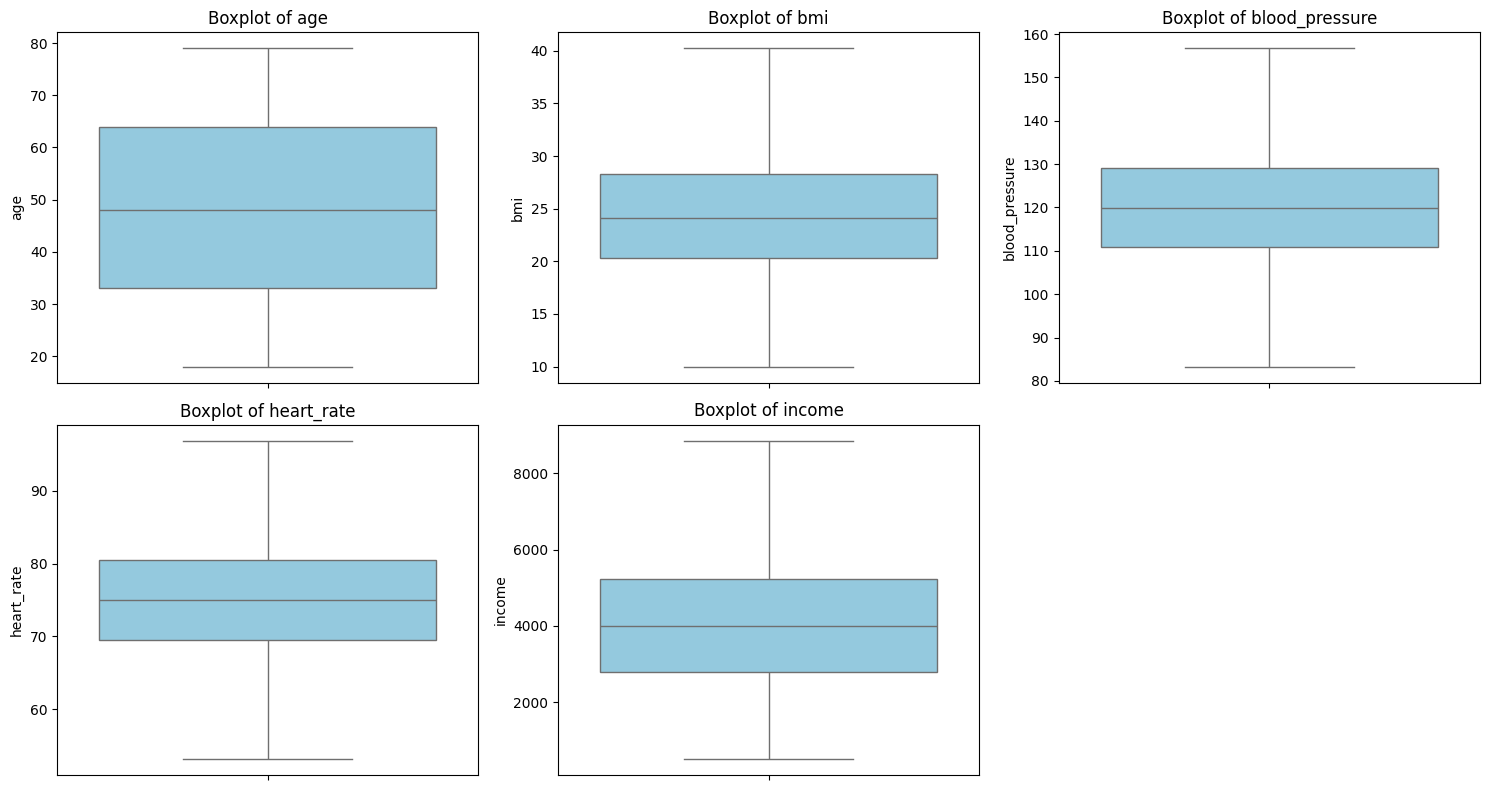

In [38]:
# Create boxplots for key numerical features
cols_to_check = ['age', 'bmi', 'blood_pressure', 'heart_rate', 'income']

plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

In [18]:
# Function to count outliers based on IQR
def count_outliers(data):
    outlier_counts = {}
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count values outside the bounds
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Run the check
print("Outlier counts per column:")
print(count_outliers(df))

Outlier counts per column:
{'age': 0, 'height': 0, 'weight': 0, 'bmi': 0, 'bmi_estimated': 0, 'bmi_scaled': 0, 'bmi_corrected': 0, 'waist_size': 0, 'blood_pressure': 0, 'heart_rate': 0, 'cholesterol': 0, 'glucose': 0, 'insulin': 0, 'sleep_hours': 0, 'work_hours': 0, 'physical_activity': 0, 'daily_steps': 0, 'calorie_intake': 0, 'sugar_intake': 0, 'water_intake': 0, 'screen_time': 0, 'stress_level': 0, 'mental_health_score': 0, 'income': 0, 'meals_per_day': 0, 'daily_supplement_dosage': 0, 'target': 0}


/tmp/ipython-input-437382479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='magma')


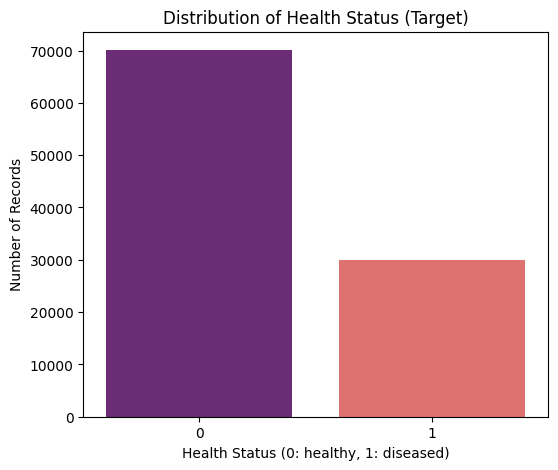

In [39]:
plt.figure(figsize=(6, 5))
sns.countplot(x='target', data=df, palette='magma')
plt.title('Distribution of Health Status (Target)')
plt.xlabel('Health Status (0: healthy, 1: diseased)')
plt.ylabel('Number of Records')
plt.savefig('target_distribution.png')
plt.show()

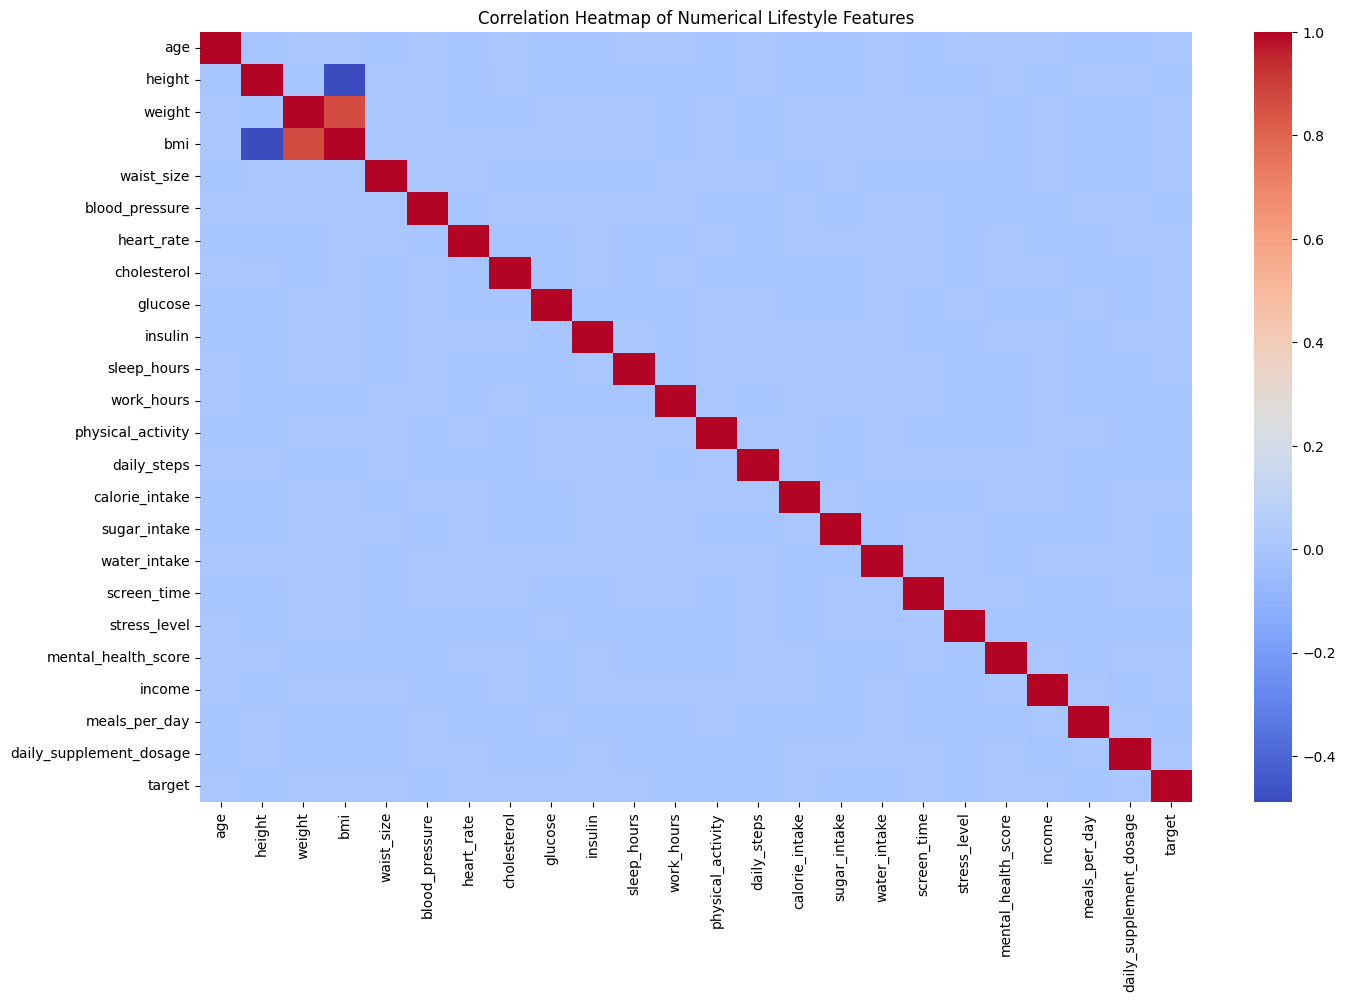

In [28]:
plt.figure(figsize=(16, 10))
# Calculate correlation for numerical columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Lifestyle Features')
plt.savefig('correlation_heatmap.png')
plt.show()

In [21]:
# Task: Remove redundant BMI columns to prevent multicollinearity
redundant_cols = ['bmi_estimated', 'bmi_scaled', 'bmi_corrected']
df.drop(columns=redundant_cols, inplace=True, errors='ignore')

print(f"Redundant columns dropped. Remaining columns: {len(df.columns)}")
# Verify the remaining columns
print(df.columns)

Redundant columns dropped. Remaining columns: 41
Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'daily_supplement_dosage', 'target'],
      dtype='object')


In [22]:
# One-Hot Encoding for all other categorical features
# Truning Categorical into 0s and 1s
df = pd.get_dummies(df, drop_first=True)

# 3. Final Check
print("New Shape of Dataset:", df.shape)
print("\nFirst 5 rows of encoded data:")
df.head()

New Shape of Dataset: (100000, 60)

First 5 rows of encoded data:


,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,device_usage_low,device_usage_moderate,healthcare_access_moderate,healthcare_access_poor,insurance_yes,sunlight_exposure_low,sunlight_exposure_moderate,caffeine_intake_moderate,family_history_yes,pet_owner_yes
0,56,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,...,False,False,False,True,False,False,False,True,False,True
1,69,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,...,False,True,True,False,False,False,False,False,True,False
2,46,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,...,False,False,False,False,True,False,False,True,False,False
3,32,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,...,True,False,True,False,False,False,False,True,False,True
4,60,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,...,True,False,True,False,True,False,False,False,True,True


In [23]:
# 1. Separate Features and Target
X = df.drop('target', axis=1)
y = df['target']

# 2. The Robust Split
# stratify=y is the "gold standard" for classification tasks
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Scaling (Crucial for Neural Networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only on training data to prevent "Data Leakage"
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Fit only on the training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.neural_network import MLPClassifier

# Define the model architecture
# hidden_layer_sizes=(64, 32) means two hidden layers with 64 and 32 neurons respectively
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

#Neural NetWork Model

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = mlp_model.predict(X_test_scaled)

# Print results
print("Neural Network (MLP) Performance:")
print("-" * 30)
print(classification_report(y_test, y_pred))

# To get specific values for your comparison table later
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Neural Network (MLP) Performance:
------------------------------
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     14019
           1       0.30      0.17      0.21      5981

    accuracy                           0.63     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.63      0.60     20000

Overall Accuracy: 0.6322


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression with balanced weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Evaluate
y_pred_log = log_reg.predict(X_test_scaled)

print("--- Logistic Regression (Balanced) Performance ---")
print(classification_report(y_test, y_pred_log))

--- Logistic Regression (Balanced) Performance ---
              precision    recall  f1-score   support

           0       0.70      0.50      0.58     14019
           1       0.30      0.49      0.37      5981

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.50      0.52     20000



#Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest with balanced weights
# n_jobs=-1 makes it run faster on Colab
rf_model_balanced = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)

print("Training Balanced Random Forest...")
rf_model_balanced.fit(X_train_scaled, y_train)

# Evaluate
y_pred_rf = rf_model_balanced.predict(X_test_scaled)

print("--- Random Forest (Balanced) Performance ---")
print(classification_report(y_test, y_pred_rf))

Training Balanced Random Forest...
--- Random Forest (Balanced) Performance ---
              precision    recall  f1-score   support

           0       0.70      0.73      0.72     14019
           1       0.29      0.26      0.27      5981

    accuracy                           0.59     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.58      0.59      0.58     20000



/tmp/ipython-input-4278076039.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


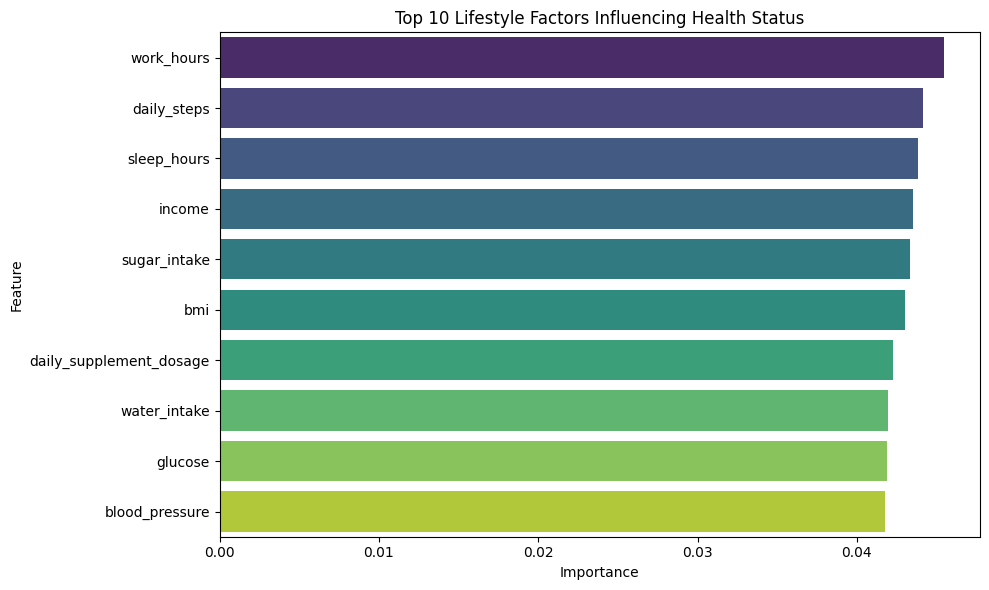

In [32]:
# Extract feature importance from trained Random Forest
importances = rf_model_balanced.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10),
    palette='viridis'
)
plt.title('Top 10 Lifestyle Factors Influencing Health Status')
plt.tight_layout()
plt.savefig('top_10_features.png')
plt.show()

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Get Neural Network predictions (assuming mlp_model is from Task 2)
y_pred_nn = mlp_model.predict(X_test_scaled)

comparison_dict = {
    "Model": ["Neural Network (MLP)", "Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1-Score (Class 1)": [
        f1_score(y_test, y_pred_nn),
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
}

print(pd.DataFrame(comparison_dict))

                  Model  Accuracy  F1-Score (Class 1)
0  Neural Network (MLP)   0.63220            0.212082
1   Logistic Regression   0.49770            0.369128
2         Random Forest   0.59095            0.272218


In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# 1. Calculate scores for Logistic Regression
log_acc = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)

# 2. Calculate scores for Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print("--- MODEL RESULTS ---")
print(f"Logistic Regression:")
print(f"  - Accuracy: {log_acc:.4f}")
print(f"  - F1-Score: {log_f1:.4f}")
print(f"  - Recall:   {log_recall:.4f} ")

print(f"\nRandom Forest:")
print(f"  - Accuracy: {rf_acc:.4f}")
print(f"  - F1-Score: {rf_f1:.4f}")
print(f"  - Recall:   {rf_recall:.4f}")
print("-" * 30)

# 3. Decision Logic based on Recall
if log_recall > rf_recall:
    print("Logistic Regression has more Recall")
else:
    print("Random Forest has more Recall")

--- MODEL RESULTS ---
Logistic Regression:
  - Accuracy: 0.4977
  - F1-Score: 0.3691
  - Recall:   0.4914 

Random Forest:
  - Accuracy: 0.5909
  - F1-Score: 0.2722
  - Recall:   0.2558
------------------------------
Logistic Regression has more Recall


#Hypermarameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Define the 'Search Space' (The settings we want to test)
param_distributions = {
    'C': np.logspace(-4, 4, 20),      # Tests values from 0.0001 to 10000
    'solver': ['liblinear', 'lbfgs'], # Different math algorithms for the model
    'max_iter': [100, 500, 1000]
}

# 2. Initialize the RandomizedSearch
# n_iter=10 means it will pick 10 random combinations to try
# cv=5 means it will do 5-fold Cross-Validation for each
random_search = RandomizedSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

print("Starting Randomized Search... this will be much faster than Grid Search.")
random_search.fit(X_train_scaled, y_train)

# 3. View the best settings found
print(f"Best Parameters: {random_search.best_params_}")
best_tuned_model = random_search.best_estimator_
# Evaluate the tuned model on the TEST set
y_pred_tuned = best_tuned_model.predict(X_test_scaled)

print("--- TUNED LOGISTIC REGRESSION PERFORMANCE ---")
print(classification_report(y_test, y_pred_tuned))



Starting Randomized Search... this will be much faster than Grid Search.
Best Parameters: {'solver': 'liblinear', 'max_iter': 1000, 'C': np.float64(0.0001)}
--- TUNED LOGISTIC REGRESSION PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.70      0.50      0.58     14019
           1       0.30      0.50      0.37      5981

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.58      0.50      0.52     20000



#Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# 1. Initialize the selector to pick the top 10 features
# f_classif uses ANOVA to see which features have the most influence on the target
selector = SelectKBest(score_func=f_classif, k=10)

# 2. Fit the selector to your training data
# We use the scaled data to ensure the math is fair for all features
selector.fit(X_train_scaled, y_train)

# 3. Transform the data to keep ONLY those 10 features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# 4. Identify the names of these 10 features for your report
selected_mask = selector.get_support()
selected_feature_names = X.columns[selected_mask]

print("--- TOP 10 SELECTED FEATURES ---")
print(selected_feature_names.tolist())


--- TOP 10 SELECTED FEATURES ---
['age', 'blood_pressure', 'work_hours', 'daily_steps', 'gender_male', 'sleep_quality_good', 'sleep_quality_poor', 'job_type_office', 'diet_type_vegan', 'sunlight_exposure_moderate']


--- FINAL OPTIMIZED MODEL PERFORMANCE ---
Features used: 10 Key Lifestyle Indicators
----------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.50      0.59     14019
           1       0.30      0.50      0.37      5981

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.50      0.52     20000



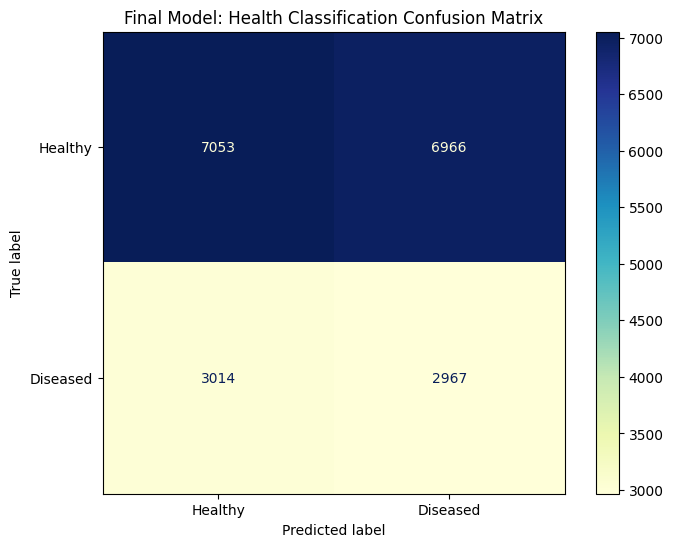


--- FINAL MODEL COMPARISON ---
                                 Model  Accuracy  F1 Score
0  Final Optimized Logistic Regression     0.501  0.372879


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Initialize the final model with Best Parameters
# We keep class_weight='balanced' to handle the health data imbalance
final_model = LogisticRegression(
    C=0.0001,
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

#  Train the model using ONLY the 10 SELECTED features
# X_train_selected and X_test_selected come from your Task 5 code
final_model.fit(X_train_selected, y_train)

# 3. Final Predictions
y_pred_final = final_model.predict(X_test_selected)

# 4. Final Performance Output
print("--- FINAL OPTIMIZED MODEL PERFORMANCE ---")
print("Features used: 10 Key Lifestyle Indicators")
print("-" * 40)
print(classification_report(y_test, y_pred_final))

# 5. The "Portfolio Masterpiece": Final Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Diseased'])

# Use a professional color scheme for your report
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='YlGnBu', ax=ax)
plt.title('Final Model: Health Classification Confusion Matrix')
plt.savefig('final_confusion_matrix.png')
plt.show()
# Final Accuracy & F1 Score
from sklearn.metrics import accuracy_score, f1_score

final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

final_results = pd.DataFrame({
    "Model": ["Final Optimized Logistic Regression"],
    "Accuracy": [final_accuracy],
    "F1 Score": [final_f1]
})

print("\n--- FINAL MODEL COMPARISON ---")
print(final_results)
